### **$$Response \ to \ Marketing \ Campaign \ by \ SparkCognition$$**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import numpy as np
from pathlib import Path
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [2]:
csv_path = Path("Response_to_marketing_campaign") / "datasets" / "marketing_training.csv"

In [3]:
train_df = pd.read_csv('/Response_to_marketing_campaign/datasets/marketing_training.csv')
test_df = pd.read_csv('/Response_to_marketing_campaign/datasets/marketing_test.csv').drop('Unnamed: 0',axis = 1)

In [4]:
display(train_df.head(5))
train_df.name = 'Training_Data'
display(test_df.head(5))
test_df.name = 'Testing_Data'

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,NaN,entrepreneur,married,university.degree,no,yes,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,48.0,entrepreneur,married,NaN,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
3,35.0,blue-collar,married,NaN,no,yes,no,telephone,jun,tue,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,999.0,0
4,39.0,blue-collar,married,basic.6y,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         614 non-null    float64
 1   profession      824 non-null    object 
 2   marital         824 non-null    object 
 3   schooling       573 non-null    object 
 4   default         824 non-null    object 
 5   housing         824 non-null    object 
 6   loan            824 non-null    object 
 7   contact         824 non-null    object 
 8   month           824 non-null    object 
 9   day_of_week     748 non-null    object 
 10  campaign        824 non-null    int64  
 11  pdays           824 non-null    int64  
 12  previous        824 non-null    int64  
 13  poutcome        824 non-null    object 
 14  emp.var.rate    824 non-null    float64
 15  cons.price.idx  824 non-null    float64
 16  cons.conf.idx   824 non-null    float64
 17  euribor3m       824 non-null    flo

In [7]:
(train_df.isnull().sum()/7414)*100

custAge           24.332344
profession         0.000000
marital            0.000000
schooling         29.066631
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
month              0.000000
day_of_week        9.589965
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
pmonths            0.000000
pastEmail          0.000000
responded          0.000000
dtype: float64

### **~ Observation:**

- The columns `'custAge'`,`'schooling'` and `'day_of_week'` columns consist of null values. with `'custAge'` has approx 24% null values, `'schooling'` has approx 29% null values and lastly `'day_of_week'` has approx 9.5% null values.

### **@ Approach:**

- As the mentioned columns have quite a number of null values hence dropping the rows won't be feasible.
- Instead of dropping the rows we can fill the numeric column that is `'custAge'` with **mean** or **median** and categorical columns `'schooling'` and `'day_of_week'` with **mode**.

******************************* Treating the null values in customer age column ***************************************
********************************************* Mean Imputation *********************************************************


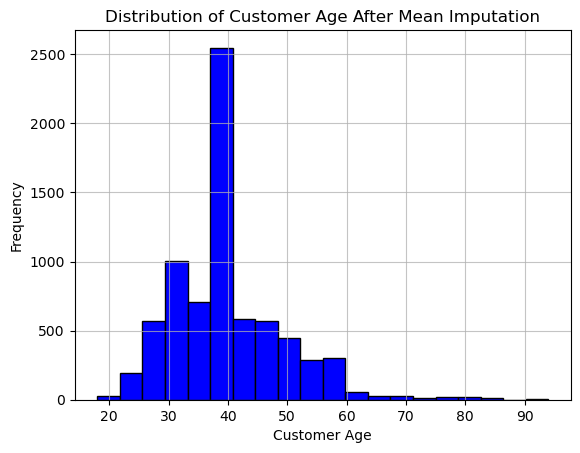

********************************************* Median Imputation *******************************************************


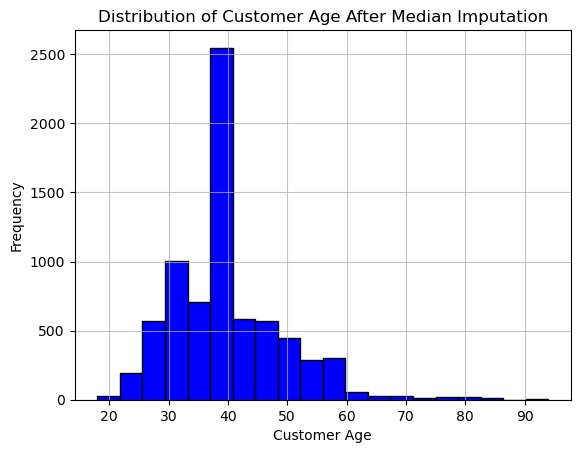

In [8]:
# for Customer Age we impute with mean or median as its numerical column
print('******************************* Treating the null values in customer age column ***************************************')
custAge_mean = int(train_df[train_df['custAge'].isna()==False].custAge.mean())
custAge_median = int(train_df[train_df['custAge'].isna()==False].custAge.median())

print('********************************************* Mean Imputation *********************************************************')

mean_impute = train_df.custAge.fillna(custAge_mean)
plt.hist(mean_impute,bins = 20,color = 'blue',edgecolor = 'black')
plt.title('Distribution of Customer Age After Mean Imputation')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid(alpha = 0.75)
plt.show()

print('********************************************* Median Imputation *******************************************************')

median_impute = train_df.custAge.fillna(custAge_median)
plt.hist(median_impute,bins = 20,color = 'blue',edgecolor = 'black')
plt.title('Distribution of Customer Age After Median Imputation')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid(alpha = 0.75)
plt.show()


### **~ Observation:**

- The histogram of `custAge` shows a similar **left-skewed** distribution when missing values are filled with either the **mean** or the **median**.
### **@ Approach:**
- Since both give similar results and **median** is generally more robust to skewed data, we will proceed with **median imputation**.


In [9]:
train_df.custAge = train_df.custAge.fillna(custAge_median) 
test_df.custAge = test_df.custAge.fillna(custAge_median)

In [10]:
# imputaiton of Schooling and day_of_week columns

print('******************************* Treating the null values in schooling and day_of_week column ***************************************')

schooling_mode = train_df[train_df['schooling'].isna()==False]['schooling'].mode()[0]
day_of_week_mode = train_df[train_df['day_of_week'].isna()==False]['day_of_week'].mode()[0]
print(f"Mode of schooling column is : {schooling_mode}")
print(f"Mode of day_of_week column is : {day_of_week_mode}")
train_df.schooling = train_df.schooling.fillna(schooling_mode) # imputation with mode as categorical column
train_df.day_of_week = train_df.day_of_week.fillna(day_of_week_mode) # imputation with mode as categorical column
test_df.schooling = test_df.schooling.fillna(schooling_mode) # imputation with mode as categorical column
test_df.day_of_week = test_df.day_of_week.fillna(day_of_week_mode) # imputation with mode as categorical column

******************************* Treating the null values in schooling and day_of_week column ***************************************
Mode of schooling column is : university.degree
Mode of day_of_week column is : mon


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         7414 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       7414 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     7414 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [12]:
lst = [train_df,test_df]
for i in lst:
    print(f"************************************************** {i.name} ****************************************************************")
    for j in i.columns:
        print(j)
        print(i[j].unique())
        print(len(i[j]))

************************************************** Training_Data ****************************************************************
custAge
[55. 38. 42. 47. 35. 28. 46. 41. 49. 40. 32. 34. 31. 26. 30. 37. 33. 54.
 22. 43. 27. 57. 56. 52. 39. 29. 67. 58. 44. 50. 51. 60. 45. 53. 36. 25.
 48. 59. 65. 23. 21. 77. 64. 81. 78. 63. 85. 24. 79. 82. 68. 74. 72. 71.
 76. 61. 75. 88. 62. 19. 70. 66. 73. 20. 18. 80. 94. 84. 91. 69. 83. 86.]
7414
profession
['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'unknown' 'self-employed' 'retired' 'student' 'entrepreneur']
7414
marital
['single' 'married' 'divorced' 'unknown']
7414
schooling
['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']
7414
default
['unknown' 'no' 'yes']
7414
housing
['no' 'yes' 'unknown']
7414
loan
['no' 'yes' 'unknown']
7414
contact
['cellular' 'telephone']
7414
month
['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']
741

<div align="left">

### **~ Observation:**

- After printing the unique values in each column, it was observed that some columns contain `'unknown'` as a value.  
- While this is not technically null, it still represents missing or uninformative data.  
- We can either **impute** these values using appropriate strategies (such as **mode imputation**),  
  or treat `'unknown'` as a **separate category** and **encode** it accordingly.

### **@ Approach:**

- I plan to check the count of `'unknown'` values in each column first.
- If the `'count'` is relatively **small**, I’ll consider imputing them (e.g., with the mode for categorical features).
- But if the count is high, I might treat `'unknown'` as a separate **category** and **encode** it instead.

</div>



In [13]:
for i in train_df.columns:
    if train_df[i].dtype=='object':
        print(f"****************************************************** {i} **********************************************************")
        print(train_df[i].value_counts())

****************************************************** profession **********************************************************
profession
admin.           1885
blue-collar      1665
technician       1212
services          719
management        536
retired           307
entrepreneur      275
self-employed     248
housemaid         187
unemployed        173
student           146
unknown            61
Name: count, dtype: int64
****************************************************** marital **********************************************************
marital
married     4445
single      2118
divorced     843
unknown        8
Name: count, dtype: int64
****************************************************** schooling **********************************************************
schooling
university.degree      3709
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
unknown                 231
illiterate          

### **~ Observation & Imputation Strategy:**

It can be observed that most of the **`unknown`** entries form a **small percentage** of the total values.  
- For example out of 7414 entries the following columns:  
  - `profession` has 61 unknowns.   
  - `marital` has 8 unknowns.  
  - `schooling` has 231 unknowns.    
  - `housing` & `loan` has 168 unknowns each.
- Except for `default` column with 1432 unknowns out of the 7414 entries which is significantly higher compared to the rest.

### **@ Approach**:
- For columns where **`unknown`** appeared less number of time, those were imputed using statistical measures like **mode**.
- For **`default`**, where the number of `unknown` entries are **high**, this **`unknown's`** are treated as a separate category and are encoded to preserve information.

In [14]:
columns_with_unknowns = ['profession','marital','schooling','housing','loan']
for i in columns_with_unknowns:
    train_df[i] = train_df[i].replace('unknown',train_df[i].mode()[0])
    test_df[i] = test_df[i].replace('unknown',train_df[i].mode()[0])

In [15]:
train_df['responded'] = train_df['responded'].map({'yes':1,'no':0}).astype(int)
train_numeric = []
train_categorical = []
for i in train_df.drop('responded',axis = 1).columns:
    if train_df[i].dtype=='object':
        train_categorical.append(i)
    else:
        train_numeric.append(i)
print(train_categorical)
print(train_numeric)

['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']


In [16]:
test_numeric = []
test_categorical = []
for i in test_df.columns:
    if test_df[i].dtype=='object':
        test_categorical.append(i)
    else:
        test_numeric.append(i)
print(test_categorical)
print(test_numeric)

['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']


In [17]:
train_encoded_df = pd.get_dummies(train_df[train_categorical], drop_first = True).astype(int).join(train_df[train_numeric])
train_encoded_df['responded'] = train_df['responded']

In [18]:
test_encoded_df = pd.get_dummies(test_df[test_categorical], drop_first=True).astype(int).join(test_df[test_numeric])
test_encoded_df = test_encoded_df.reindex(columns=train_encoded_df.columns.drop('responded'), fill_value=0)

In [19]:
possible_flags = ['schooling_illiterate','default_yes','month_mar','month_sep','poutcome_nonexistent',
                          'poutcome_success','pdays','previous','pmonths','pastEmail']
for i in possible_flags:
    print(train_encoded_df[i].value_counts())

schooling_illiterate
0    7413
1       1
Name: count, dtype: int64
default_yes
0    7413
1       1
Name: count, dtype: int64
month_mar
0    7321
1      93
Name: count, dtype: int64
month_sep
0    7302
1     112
Name: count, dtype: int64
poutcome_nonexistent
1    6350
0    1064
Name: count, dtype: int64
poutcome_success
0    7150
1     264
Name: count, dtype: int64
pdays
999    7123
6        85
3        82
4        22
7        15
9        15
2        13
12       11
10        8
5         7
13        6
14        5
11        4
15        4
1         3
8         3
16        2
17        2
0         2
22        1
21        1
Name: count, dtype: int64
previous
0    6350
1     855
2     147
3      41
4      13
5       7
6       1
Name: count, dtype: int64
pmonths
999.000000    7123
0.200000        85
0.100000        82
0.133333        22
0.233333        15
0.300000        15
0.066667        13
0.400000        11
0.333333         8
0.166667         7
0.433333         6
0.466667         5
0.366667

### **~ Observation:**

- There are columns with only 1 or 2 positive samples like **`schooling_illiterate`** and **`default_yes`**.

- The columns **`pdays`** and **`pmonths`** basically tells when was the person contacted. 

- The columns **`months`**, **`poutcome_success`**, **`previous`** and **`pastEmail`** are informative can be kept as it is.

### **@ Approach**:

- Dropping columns **`schooling_illiterate`** and **`default_yes`** as doesn't adds much value to the overall analysis.

- Transforming the columns **`pdays`** and **`pmonths`** into binary

- Also, outlier detection was considered, but due to the imbalanced nature of the dataset and risk of losing minority class information, no aggressive outlier removal or capping was applied. 


In [20]:
train_encoded_df.drop(['schooling_illiterate','default_yes'],axis = 1,inplace = True)
test_encoded_df.drop(['schooling_illiterate','default_yes'],axis = 1,inplace = True)

In [21]:
train_encoded_df['pdays'] = train_encoded_df['pdays'].apply(lambda x: 0 if x==999 else 1).astype(int)
train_encoded_df['pmonths'] = train_encoded_df['pmonths'].apply(lambda x: 0 if x==999 else 1).astype(int)
test_encoded_df['pdays'] = test_encoded_df['pdays'].apply(lambda x: 0 if x==999 else 1).astype(int)
test_encoded_df['pmonths'] = test_encoded_df['pmonths'].apply(lambda x: 0 if x==999 else 1).astype(int)

### **~Observation :**
- The output class is highly imbalance.
### **@Approach :**

- Apply SMOTE only on training data only to avoid leakage.
- Also, it balances the dataset by synthesizing new minority samples.

In [22]:
x_train,x_test,y_train,y_test = train_test_split(train_encoded_df.drop('responded',axis=1),train_encoded_df['responded'],test_size = 0.2,random_state = 42,shuffle = True)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

### **AdaBoost Classifier :**

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=50, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
thresholds = np.arange(0.1, 0.6, 0.05)
f1_scores = {t: [] for t in thresholds}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_resampled, y_resampled), 1):
    X_train, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    ab.fit(X_train, y_train)
    y_proba = ab.predict_proba(X_val)[:, 1]
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        f1_scores[thresh].append(f1_score(y_val, y_pred))
        accuracy = accuracy_score(y_val,y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
avg_f1 = {t: np.mean(scores) for t, scores in f1_scores.items()}
best_thresh = max(avg_f1, key=avg_f1.get)
print(f"Best Threshold is {best_thresh} and Average F1 score is {avg_f1[best_thresh]}")

Best Threshold is 0.5000000000000001 and Average F1 score is 0.8430743197065429


### **Decision Tree Classifier :**

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
thresholds = np.arange(0.1, 0.6, 0.05)
f1_scores = {t: [] for t in thresholds}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_resampled, y_resampled), 1):
    X_train, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    clf.fit(X_train, y_train)
    y_proba = clf.predict_proba(X_val)[:, 1]
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        f1_scores[thresh].append(f1_score(y_val, y_pred))
        accuracy = accuracy_score(y_val,y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
avg_f1 = {t: np.mean(scores) for t, scores in f1_scores.items()}
best_thresh = max(avg_f1, key=avg_f1.get)
print(f"Best Threshold is {best_thresh} and Average F1 score is {avg_f1[best_thresh]}")

Best Threshold is 0.5000000000000001 and Average F1 score is 0.8941045927240312


### **Random Forest Classifier :**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
thresholds = np.arange(0.1, 0.6, 0.05)
f1_scores = {t: [] for t in thresholds}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_resampled, y_resampled), 1):
    X_train, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    rf.fit(X_train, y_train)
    y_proba = rf.predict_proba(X_val)[:, 1]
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        f1_scores[thresh].append(f1_score(y_val, y_pred))
        accuracy = accuracy_score(y_val,y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
avg_f1 = {t: np.mean(scores) for t, scores in f1_scores.items()}
best_thresh = max(avg_f1, key=avg_f1.get)
print(f"Best Threshold is {best_thresh} and Average F1 score is {avg_f1[best_thresh]}")

Best Threshold is 0.5500000000000002 and Average F1 score is 0.9370181290819823


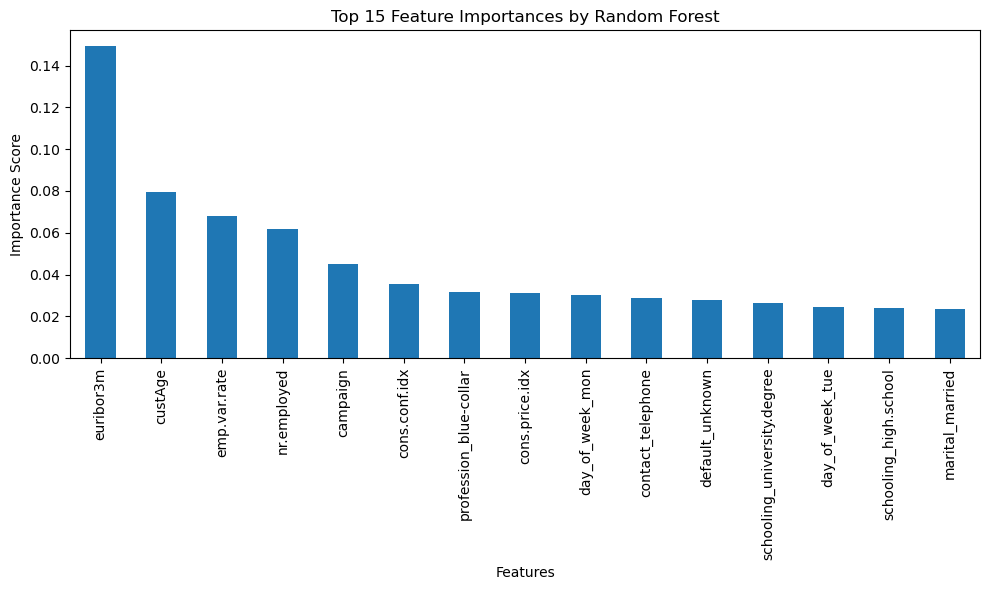

In [26]:
imp_features = pd.Series(rf.feature_importances_, index=X_resampled.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
imp_features.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances by Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [27]:
opt_model = RandomForestClassifier(n_estimators=200, max_depth=None,random_state=42)
opt_model.fit(X_resampled, y_resampled)
test_proba = opt_model.predict_proba(test_encoded_df)[:,1]
test_pred = (test_proba >= best_thresh).astype(int)
print(test_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 

<div align="left">

### **~ Summary:**

- Outlier removal was eliminated to avoid the loss of minority data.
- The unknown and near constant features were omitted or coded accordingly.
- the colums with one class were dropped like schooling_illiterate or default_yes
- Columns like pdays and pmonths were converted to binary for extract the underlying meaning from the data.
- Only the training data was used to apply the SMOTE without compromising data leakage.
- A RF model used with the threshold to take care of the problem of class imbalance.
- Thresholds were chosen with the use of cross-validation to be robust to generalization.
- Lastly, feature importance graph was visualized to make it easier to understand.

### **Questions & Answers**

**1. Describe your model and why did you choose this model over other types of models?**

The final model selected is SMOTE+Random Forest Classifier. As SMOTE balances the classes by adding synthetic minority samples, and Random Forest effectively learns from this more balanced data using its ensemble approach.


**2. Describe any other models you have tried and why do you think this model performs better?**

- **Models tried**:

    - **Logistic Regression**: When combined with SMOTE LR achieved high accuracy, but it failed to address the minority class.
                               The best threshold achieved was 0.40 with average F1_score = 0.83.
    - **AdaBoost**: With SMOTE it Performed slightly better than LR but is sensitive to noise introduced by SMOTE,
                    Best threshold achieved was 0.50 with average F1_score = 0.843
    - **Decision Tree**: With SMOTE Decision Tree performed better than both LR and AdaBoost, Best threshold achieved was 0.50 with average                           F1_score = 0.8915. But it is prone to overfitting 
    - **Random forest**: Combined with SMOTE and threshold tuning it Performed better than all the previous models as it combines many                                decision trees, reduces chance of overfitting and captures the complex patterns in the data that was balanced
                         after SMOTE, Best average F1 score observed is 0.936 at threshold 0.55.

**3. How did you handle missing data?**

- Instead of dropping the rows with null values, filled the numeric column that is **`'custAge'`** with **median** as it's more robust to skewed data and categorical columns **`'schooling'`** and **`'day_of_week'`** with **mode**.
- For columns where **`unknown`** appeared less number of time, those were imputed using statistical measures like **mode**.
- Columns where the number of **`unknown`** entries were **high**, those were treated as a separate category and were encoded to preserve information.
- Dropped columns **`schooling_illiterate`** and **`default_yes`** as doesn't adds much value to the overall analysis.
- Transforming the columns **`pdays`** and **`pmonths`** into binary to preserve underlying information.

**4. How did you handle categorical (string) data?**

- Used **one-hot encoding** (`pd.get_dummies`) on categorical features.

**5. How did you handle unbalanced data?**

- Used **SMOTE** to oversample minority class in training set only to avoid data leakage.

**6. How did you test your model?**

- Split data into **train/test sets**.
- Applied **cross-validation** on training set for robust model selection and threshold tuning.
- Final evaluation performed using metrics **precision, recall, F1_score** (not just accuracy).
